In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.layers.core import Dense,Activation

In [3]:
from keras.optimizers import Adam

In [4]:
from keras.metrics import categorical_crossentropy

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
from keras.models import Model

In [7]:
from keras.layers import Dense,GlobalAveragePooling2D

In [8]:
from keras.applications import MobileNet

In [9]:
from keras.applications.mobilenet import preprocess_input

In [10]:
import numpy as np

In [11]:
base_model=MobileNet(weights='imagenet',include_top=False)

C:\Users\srijan sourav\anaconda3\envs\mine\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [12]:
x=base_model.output

In [13]:
x=GlobalAveragePooling2D()(x)

In [14]:
x=Dense(1024,activation='relu')(x)

In [15]:
x=Dense(1024,activation='relu')(x)

In [16]:
x=Dense(512,activation='relu')(x)

In [17]:
y=Dense(3,activation='softmax')(x)

In [18]:
model=Model(inputs=base_model.input,outputs=y)

In [19]:
for i,layer in enumerate(model.layers):
    print(i,layer.name)

0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [20]:
for layer in model.layers[:88]:
    layer.trainable=False

In [21]:
for layer in model.layers[88:]:
    layer.trainable=True

In [22]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('face_recognize/train_set/',
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  )


Found 600 images belonging to 3 classes.


model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
step_size_train=train_generator.n//train_generator.batch_size

In [25]:
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

Epoch 1/5
18/18 [==============================] - 180s 10s/step - loss: 0.2204 - accuracy: 0.9173
Epoch 2/5
18/18 [==============================] - 175s 10s/step - loss: 5.2751e-06 - accuracy: 1.0000
Epoch 3/5
18/18 [==============================] - 174s 10s/step - loss: 2.2783e-09 - accuracy: 1.0000
Epoch 4/5
18/18 [==============================] - 174s 10s/step - loss: 2.4232e-08 - accuracy: 1.0000
Epoch 5/5
18/18 [==============================] - 173s 10s/step - loss: 1.3891e-04 - accuracy: 1.0000


In [45]:
from keras.preprocessing import image

In [46]:
img=image.load_img('face_recognize/test/test_case_1.png',target_size=(224,224))

In [47]:
img.size

(224, 224)

In [48]:
type(img)

PIL.Image.Image

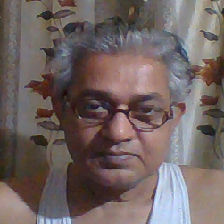

In [49]:
img

In [50]:
image_np=image.img_to_array(img)

In [51]:
type(image_np)

numpy.ndarray

In [52]:
img_np=np.expand_dims(image_np,axis=0)

In [53]:
model.predict(img_np)

array([[9.7876495e-01, 2.1149963e-02, 8.5009393e-05]], dtype=float32)

In [ ]:
from keras.applications.mobilenet import decode_predictions

In [ ]:
pred=model.predict(img_np)

In [ ]:
pred

In [ ]:
decode_predictions(pred)[0]